In [109]:
import os, sys
sys.path.append(os.path.abspath("../"))
import pandas as pd

from sklearn.model_selection import train_test_split
from utils.bootcampviztools import *
from utils.toolbox_ML import *


### REVISIÓN INICIAL DE LOS DATASET

In [110]:
df1 = pd.read_csv("../data_sample/Hotel_Reservations.csv")
print(df1.info())
if len(df1[df1.duplicated()]) == 0:
    print("No hay registros duplicados")
else:
    print(f"Hay {len(df1[df1.duplicated()])} registros duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [111]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [112]:
df2 = pd.read_csv("../data_sample/Hotel_Bookings.csv")
print(df2.info())
if len(df2[df2.duplicated()]) == 0:
    print("No hay registros duplicados")
else:
    print(f"Hay {len(df2[df2.duplicated()])} registros duplicados")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [113]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


### UNIFORMIDAD DE DATASET

In [114]:
df2.rename(columns = {"is_canceled":"booking_status",
                      "arrival_date_year":"arrival_year",
                      "arrival_date_month":"arrival_month",
                      "arrival_date_day_of_month":"arrival_date",
                      "stays_in_weekend_nights":"no_of_weekend_nights",
                      "stays_in_week_nights":"no_of_week_nights",
                      "adults":"no_of_adults",
                      "children":"no_of_children",
                      "meal":"type_of_meal_plan",
                      "market_segment":"market_segment_type",
                      "is_repeated_guest":"repeated_guest",
                      "previous_cancellations":"no_of_previous_cancellations",
                      "previous_bookings_not_canceled":"no_of_previous_bookings_not_canceled",
                      "reserved_room_type":"room_type_reserved",
                      "required_car_parking_spaces":"required_car_parking_space",
                      "total_of_special_requests":"no_of_special_requests",
                      "adr":"avg_price_per_room",
                      }, inplace = True)

In [115]:
lista_coincidencias = []
lista_no_coincidencias = []
for col in df2.columns:
    if col in df1.columns:
        lista_coincidencias.append(col)
    else:
        lista_no_coincidencias.append(col)
print(len(lista_no_coincidencias))
lista_no_coincidencias

18


['hotel',
 'arrival_date_week_number',
 'babies',
 'country',
 'distribution_channel',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [116]:
print(len(lista_coincidencias))
lista_coincidencias

18


['booking_status',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_adults',
 'no_of_children',
 'type_of_meal_plan',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'room_type_reserved',
 'avg_price_per_room',
 'required_car_parking_space',
 'no_of_special_requests']

In [117]:
for col in df1.columns:
    if col not in lista_coincidencias:
        print(col)

Booking_ID


In [118]:
dfA = df1.copy()
dfA.drop(columns = ["Booking_ID"], inplace = True)
dfB = df2[lista_coincidencias]

In [119]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [120]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   booking_status                        119390 non-null  int64  
 1   lead_time                             119390 non-null  int64  
 2   arrival_year                          119390 non-null  int64  
 3   arrival_month                         119390 non-null  object 
 4   arrival_date                          119390 non-null  int64  
 5   no_of_weekend_nights                  119390 non-null  int64  
 6   no_of_week_nights                     119390 non-null  int64  
 7   no_of_adults                          119390 non-null  int64  
 8   no_of_children                        119386 non-null  float64
 9   type_of_meal_plan                     119390 non-null  object 
 10  market_segment_type                   119390 non-null  object 
 11  

### UNIÓN DE DATASET

In [121]:
df = pd.concat([dfA,dfB],axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155665 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   no_of_adults                          155665 non-null  int64  
 1   no_of_children                        155661 non-null  float64
 2   no_of_weekend_nights                  155665 non-null  int64  
 3   no_of_week_nights                     155665 non-null  int64  
 4   type_of_meal_plan                     155665 non-null  object 
 5   required_car_parking_space            155665 non-null  int64  
 6   room_type_reserved                    155665 non-null  object 
 7   lead_time                             155665 non-null  int64  
 8   arrival_year                          155665 non-null  int64  
 9   arrival_month                         155665 non-null  object 
 10  arrival_date                          155665 non-null  int64  
 11  marke

In [122]:
if len(df[df.duplicated()]) == 0:
    print("No hay registros duplicados")
else:
    print(f"Hay {len(df[df.duplicated()])} registros duplicados")

Hay 46637 registros duplicados


### TRANSFORMACIÓN DE VALORES FALTANTES

In [72]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          4
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [73]:
mediana_children = df.no_of_children.median()
df.no_of_children = df.no_of_children.fillna(mediana_children)
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### SIMPLIFICACIÓN DE NOMBRES DE COLUMNAS

In [74]:
df.rename(columns = {"no_of_adults":"adults",
                     "no_of_children":"children",
                     "no_of_weekend_nights":"weekend_nights",
                     "no_of_week_nights":"week_nights",
                     "type_of_meal_plan":"meal_plan",
                     "required_car_parking_space":"parking",
                     "room_type_reserved":"room_type",
                     "lead_time":"lead_time",
                     "arrival_year":"arrival_year",
                     "arrival_month":"arrival_month",
                     "arrival_date":"arrival_day",
                     "market_segment_type":"ms_type",
                     "repeated_guest":"repeated_guest",
                     "no_of_previous_cancellations":"pre_cancel",
                     "no_of_previous_bookings_not_canceled":"pre_not_cancel",
                     "avg_price_per_room":"daily_price",
                     "no_of_special_requests":"special_req",
                     "booking_status":"canceled",
                     }, inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155665 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   adults          155665 non-null  int64  
 1   children        155665 non-null  float64
 2   weekend_nights  155665 non-null  int64  
 3   week_nights     155665 non-null  int64  
 4   meal_plan       155665 non-null  object 
 5   parking         155665 non-null  int64  
 6   room_type       155665 non-null  object 
 7   lead_time       155665 non-null  int64  
 8   arrival_year    155665 non-null  int64  
 9   arrival_month   155665 non-null  object 
 10  arrival_day     155665 non-null  int64  
 11  ms_type         155665 non-null  object 
 12  repeated_guest  155665 non-null  int64  
 13  pre_cancel      155665 non-null  int64  
 14  pre_not_cancel  155665 non-null  int64  
 15  daily_price     155665 non-null  float64
 16  special_req     155665 non-null  int64  
 17  canceled       

### UNIFORMIDAD DE VALORES

In [76]:
df.canceled = df.canceled.replace({"Not_Canceled":0,"Canceled":1})
df.children = df.children.astype(int)
df.meal_plan = df.meal_plan.replace({"Not Selected":"RO","Meal Plan 1":"BB","Meal Plan 2":"HB","Meal Plan 3":"FB","Undefined":"NA"})
df.arrival_month = df.arrival_month.replace({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12})

S:\Users\NewWalhalla\AppData\Local\Temp\ipykernel_6996\3661137613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.canceled = df.canceled.replace({"Not_Canceled":0,"Canceled":1})
S:\Users\NewWalhalla\AppData\Local\Temp\ipykernel_6996\3661137613.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.arrival_month = df.arrival_month.replace({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12})


https://www.kaggle.com/code/mariyamalshatta/inn-hotel-classification  
Not selected = RO = Room Only  
Meal plan 1 = BB = Bed and Breakfast  
Meal plan 2 = HB = Half Board (breakfast and 1 meal)  
Meal plan 3 = FB = Full Board (Breakfast, lunch, dinner)  
SC = Self Catering (apartamento)  
Undefined = NA (Sin determinar)  

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155665 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   adults          155665 non-null  int64  
 1   children        155665 non-null  int64  
 2   weekend_nights  155665 non-null  int64  
 3   week_nights     155665 non-null  int64  
 4   meal_plan       155665 non-null  object 
 5   parking         155665 non-null  int64  
 6   room_type       155665 non-null  object 
 7   lead_time       155665 non-null  int64  
 8   arrival_year    155665 non-null  int64  
 9   arrival_month   155665 non-null  int64  
 10  arrival_day     155665 non-null  int64  
 11  ms_type         155665 non-null  object 
 12  repeated_guest  155665 non-null  int64  
 13  pre_cancel      155665 non-null  int64  
 14  pre_not_cancel  155665 non-null  int64  
 15  daily_price     155665 non-null  float64
 16  special_req     155665 non-null  int64  
 17  canceled       

In [78]:
df.room_type.value_counts()

room_type
A              85994
Room_Type 1    28130
D              19201
E               6535
Room_Type 4     6057
F               2897
G               2094
B               1118
Room_Type 6      966
C                932
Room_Type 2      692
H                601
Room_Type 5      265
Room_Type 7      158
P                 12
Room_Type 3        7
L                  6
Name: count, dtype: int64

No sé a qué se corresponde cada uno de los códigos, así que a menos que tenga especial relevancia con respecto a la variable target, eliminaré la columna.  
Los tipos enconrtados en la propia página de INN Hotels no aclaran el código empleado.
    
Standar Room  
Studio  
One bedroom suite  
Loft queen suite  
Two bedroom suite  
Executive suite  


In [82]:
df.ms_type.value_counts()

ms_type
Online TA        56477
Offline TA/TO    24219
Online           23214
Groups           19811
Direct           12606
Offline          10528
Corporate         7312
Complementary     1134
Aviation           362
Undefined            2
Name: count, dtype: int64

Online TA = Online Travel Agencies  
Online TO = Online Tour Operator

### TRATAMIENTO DE FECHAS

In [79]:
# Decido cambiar la fecha del 29 de febrero de 2018 a 28 de febrero de 2018, porque no fue un año bisiesto.
df.loc[(df.arrival_day == 29)&(df.arrival_month == 2)&(df.arrival_year == 2018), "arrival_day"] = 28

# Creo una columna fecha con todos los datos y le doy formato.
df["arr_date"] = pd.to_datetime(dict(day = df.arrival_day, month = df.arrival_month, year = df.arrival_year), errors = "coerce")
df.arr_date.dt.strftime("%d-%m-%Y")

# Creo una columna semana con la semana a la que corresponde la fecha.
df["arr_week"] = df["arr_date"].dt.isocalendar().week
df["arr_week"] = df["arr_week"].astype(int)

# Elimino las columnas anteriores (día, mes y año).
df.drop(columns = ["arrival_day","arrival_month","arrival_year"], inplace = True)

### REORDENAMIENTO DE COLUMNAS

In [88]:
df = df.reindex(["daily_price","lead_time","adults","children","repeated_guest","pre_cancel","pre_not_cancel","arr_date","arr_week","week_nights","weekend_nights","meal_plan","room_type","parking","special_req","ms_type","canceled"], axis = 1)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155665 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   daily_price     155665 non-null  float64       
 1   lead_time       155665 non-null  int64         
 2   adults          155665 non-null  int64         
 3   children        155665 non-null  int64         
 4   repeated_guest  155665 non-null  int64         
 5   pre_cancel      155665 non-null  int64         
 6   pre_not_cancel  155665 non-null  int64         
 7   arr_date        155665 non-null  datetime64[ns]
 8   arr_week        155665 non-null  int64         
 9   week_nights     155665 non-null  int64         
 10  weekend_nights  155665 non-null  int64         
 11  meal_plan       155665 non-null  object        
 12  room_type       155665 non-null  object        
 13  parking         155665 non-null  int64         
 14  special_req     155665 non-null  int64   

<div style="background-color: #e6f3ff;">

---

##### **DESCRIPCIÓN DE LAS VARIABLES**

---
<div style="background-color: AliceBlue;">

| Variable | Tipo | Descripción |
|:---------|:----:|:------------|
| daily_price | float64 | Precio diario medio de la reserva efectuada, en euros.|
| lead_time | int64 | Días transcurridos entre la fecha de reserva y el día previsto de llegada.| 
| adults | int64 |---|
| children | int64 |---| 
| repeated_guest | int64 |---| 
| pre_cancel | int64 |---| 
| pre_not_cancel | int64 |---| 
| arr_date | datetime64 |---|
| arr_week | int64 |---|
| week_nights | int64 |---|
| weekend_nights | int64 |---|
| meal_plan | object |---|
| room_type | object |---|
| parking | int64 |---|
| special_req | int64 |---|
| ms_type | object |---|
| canceled | int64 |---|

</div>

---

<div style="text-align: left;background-color: #e6f3ff;">

En un primer vistazo a los datos del dataset no se aprecian valores nulos ni registros duplicados, aunque se <br>
realizará una inspección más a fondo por si se encontrara alguna inconsistencia en los datos registrados.<br><br>
El primer paso será separar los datos en los sets de train y test para evitar el análisis accidental del dataset<br>
de testeto e identificar la variable 'target'.<br><br>

---
</div>

About columns

    ID : unique identifier of each booking
    n_adults : Number of adults
    n_children : Number of Children
    weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    meal_plan : Type of meal plan booked by the customer:
    car_parking_space : Does the customer require a car parking space? (0 - No, 1- Yes)
    room_type : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    lead_time : Number of days between the date of booking and the arrival date
    year : Year of arrival date
    month : Month of arrival date
    date : Date of the month
    market_segment : Market segment designation.
    repeated_guest : Is the customer a repeated guest? (0 - No, 1- Yes)
    previous_cancellations : Number of previous bookings that were canceled by the customer prior to the current booking
    previous_bookings_not_canceled : Number of previous bookings not canceled by the customer prior to the current booking
    avg_room_price : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    special_requests : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    status : Flag indicating if the booking was canceled or not.


### SEPARO LOS DATOS EN CONJUNTOS DE TRAIN Y TEST

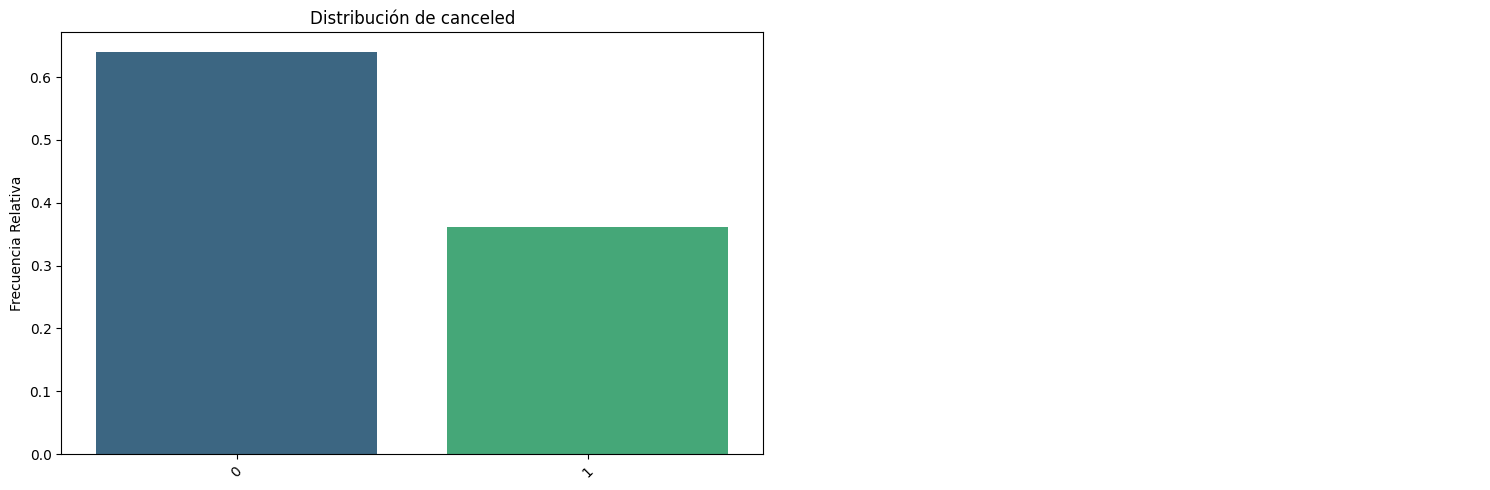

In [96]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
target = "canceled"

train_set[target].value_counts()
pinta_distribucion_categoricas(train_set, [target], relativa = True)

In [97]:
df_tip = tipifica_variables(train_set, 11, 0.05)
df_tip

,nombre_variable,tipo_sugerido
0,daily_price,Numérica Continua
1,lead_time,Numérica Continua
2,adults,Numérica Discreta
3,children,Categorica
4,repeated_guest,Binaria
5,pre_cancel,Numérica Discreta
6,pre_not_cancel,Numérica Continua
7,arr_date,Numérica Continua
8,arr_week,Numérica Discreta
9,week_nights,Numérica Discreta


In [98]:
lista_cat = df_tip.loc[(df_tip.tipo_sugerido == "Categorica")|(df_tip.tipo_sugerido == "Binaria")]["nombre_variable"].tolist()
lista_cat.remove(target)
lista_cat

['children',
 'repeated_guest',
 'meal_plan',
 'parking',
 'special_req',
 'ms_type']

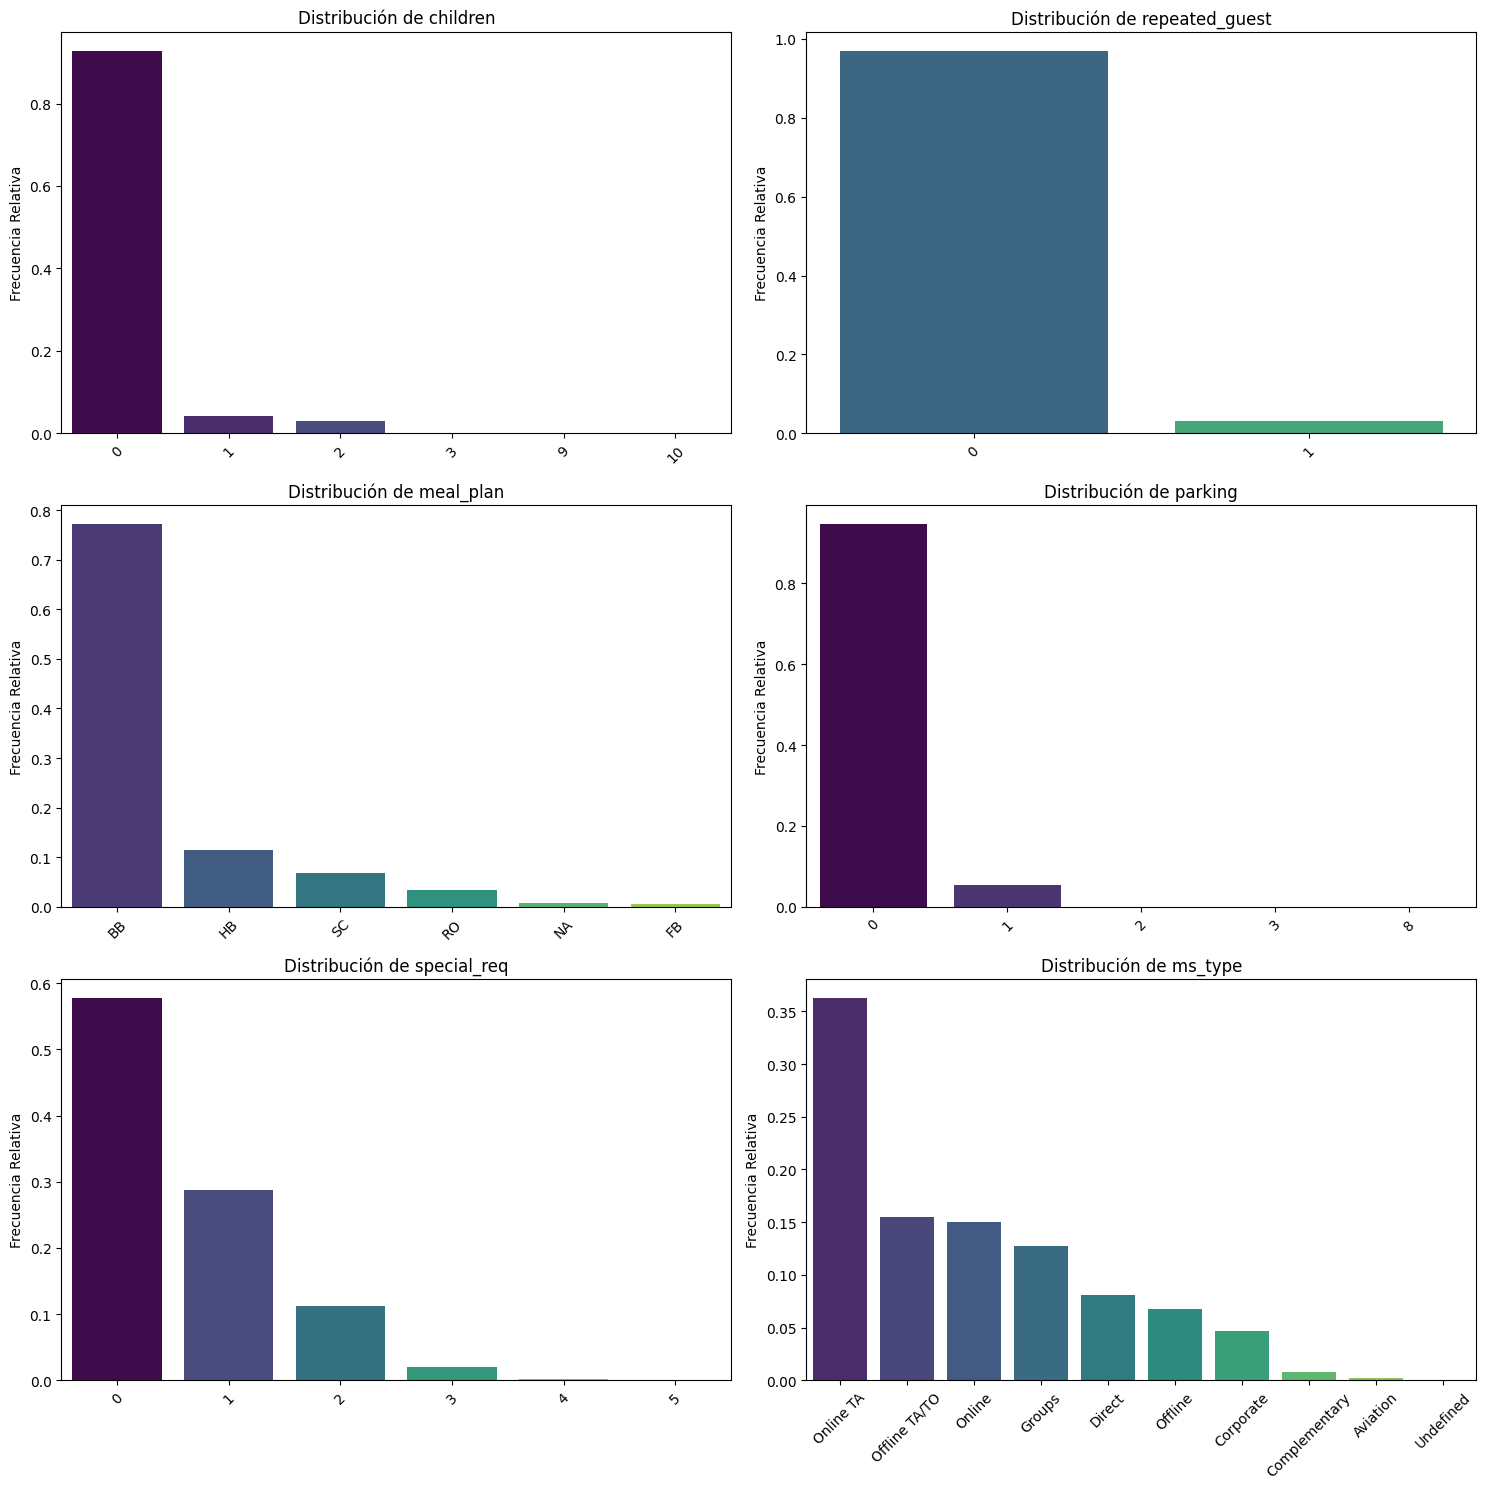

In [94]:
pinta_distribucion_categoricas(train_set, lista_cat, relativa = True, mostrar_valores = False, giro = 45)

In [100]:
lista_num = df_tip.loc[(df_tip.tipo_sugerido != "Categorica")&(df_tip.tipo_sugerido != "Binaria")]["nombre_variable"].tolist()
lista_num

['daily_price',
 'lead_time',
 'adults',
 'pre_cancel',
 'pre_not_cancel',
 'arr_date',
 'arr_week',
 'week_nights',
 'weekend_nights',
 'room_type']

In [107]:
for col in train_set.columns:
    print(train_set[col].value_counts(),"\n")

daily_price
62.00     3029
75.00     2790
65.00     2591
90.00     2497
0.00      2045
          ... 
79.06        1
175.67       1
135.43       1
183.10       1
100.18       1
Name: count, Length: 8206, dtype: int64 

lead_time
0      6117
1      3634
2      2161
3      1958
4      1897
       ... 
709       1
463       1
371       1
380       1
737       1
Name: count, Length: 475, dtype: int64 

adults
2     92619
1     24566
3      6829
0       441
4        63
26        4
20        2
27        2
5         2
40        1
6         1
55        1
10        1
Name: count, dtype: int64 

children
0     115508
1       5195
2       3750
3         75
9          2
10         2
Name: count, dtype: int64 

repeated_guest
0    120735
1      3797
Name: count, dtype: int64 

pre_cancel
0     119093
1       4981
2        130
3         86
11        48
24        36
4         34
5         24
26        21
6         20
25        20
19        13
13        13
14        13
Name: count, dtype: int64 

pre_

### TRANSFORMACIONES

In [103]:
# Convierto en binarias las variables 'children', 'pre_cancel', 'pre_not_cancel', 'parking'


parking
0    117728
1      6780
2        21
3         2
8         1
Name: count, dtype: int64